Q1. Explain GET and POST methods.

In [ ]:
'''A1.

GET and POST are two commonly used HTTP methods while building web applications with Flask.

GET method is ofently used for retrieving data from server. It is a safe because with this there is no side effect on the server or the 
application state. In Flask, we can handle GET requests by defining a route using the @app.route decorator with the default HTTP method
being GET
The POST method is used to send data to the server to be processed, typically used for submitting forms or sending data that needs to be 
kept private. To handle POST requests in Flask, we need to define a route using the @app.route decorator with the HTTP method POST

Example:
'''

#GET
from flask import Flask
app = Flask(__name)
@app.route('/hello', methods=['GET'])
def hello():
    return 'Hello, World!'

#POST
@app.route('/submit', methods=['POST'])
def submit():
    if request.method == 'POST':
        data = request.form['data']  # Access data from a form field named 'data'
        # Process the data and return a response
        return f'Received data: {data}'


Q2. Why is request used in Flask?

A2. We can access the data sent with a POST request in Flask using the request object. Example is shown in above example in #POST section. 

Q3. Why is redirect() used in Flask?

In [ ]:
'''A3.

In Flask, the redirect() function is used to perform a server-side redirection to a different URL. It allows us to send an HTTP response that 
instructs the client's web browser to navigate to a different URL. This can be useful for various purposes in web development like
Navigation- Redirecting users to a different page or route within your Flask application. This is commonly used after processing a form 
submission or when you want to direct users to a different part of your application. Example:
'''

from flask import Flask, redirect, url_for
app = Flask(__name)

@app.route('/home')
def home():
    # Perform some processing
    # Redirect the user to another page (e.g., 'about' route)
    return redirect(url_for('about'))

@app.route('/about')
def about():
    return 'About Us'

if __name__ == '__main__':
    app.run()


Q4. What are templates in Flask? Why is the render_template() function used?

A4. 

Templates in Flask are used to separate the presentation (HTML) from the application's Python code. It locates the template file, processes it using the Jinja2 template engine, and returns the resulting HTML as an HTTP response. This function is essential for generating dynamic web pages that incorporate data and provide a consistent look and feel. Example:

In [ ]:
from flask import Flask, render_template
app = Flask(__name)

# Define a route that renders an HTML template
@app.route('/hello/<name>')
def hello(name):
    # Pass the 'name' variable to the template
    return render_template('hello.html', name=name)

if __name__ == '__main__':
    app.run()

'''
In this example

We create a Flask application.
We define a route /greet/<name> that takes a name parameter in the URL.
Inside the route function, we use render_template() to render the greet.html template, passing the name variable to it.
'''

Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

In [ ]:
''' A5 created api to take 3 inputs from user through POST method in form and using GET method, passing result to the client system.
Below is the example of api creation for simple calculator and tested it using postman  for percentage operation, Screenshot is shared below.
'''

from flask import Flask, request, render_template, jsonify
app = Flask(__name__)

@app.route("/")
def home():
    return render_template('index.html')

@app.route('/math', methods=['POST'])
def math():
    #Passing data through form
    # value1 = float(request.form.get('value1'))
    # value2 = float(request.form.get('value2'))
    # operation = request.form.get('operation')
    value1 = float(request.json.get('value1'))
    value2 = float(request.json.get('value2'))
    operation = request.json.get('operation')
    
    if operation == 'add':
        result = value1 + value2
        operation_name = 'Addition'

    elif operation == 'subtract':
        result = value1 - value2
        operation_name = 'Subtraction'

    elif operation == 'multiply':
        result = value1 * value2
        operation_name = 'Multiplication'

    elif operation == 'divide':
        if value2 == 0:
            return "Division by zero is not allowed."
        result = value1 / value2
        operation_name = 'Division'

    elif operation == 'percentage':
        result = (value1 / 100) * value2
        operation_name = 'Percentage'

    else:
        return "Invalid operation selected."

    #return render_template('results.html', operation_name=operation_name, value1=value1, value2=value2, result=result)
    return jsonify("The result is {}".format(result))

if __name__=="__main__":
    app.run(host="0.0.0.0")


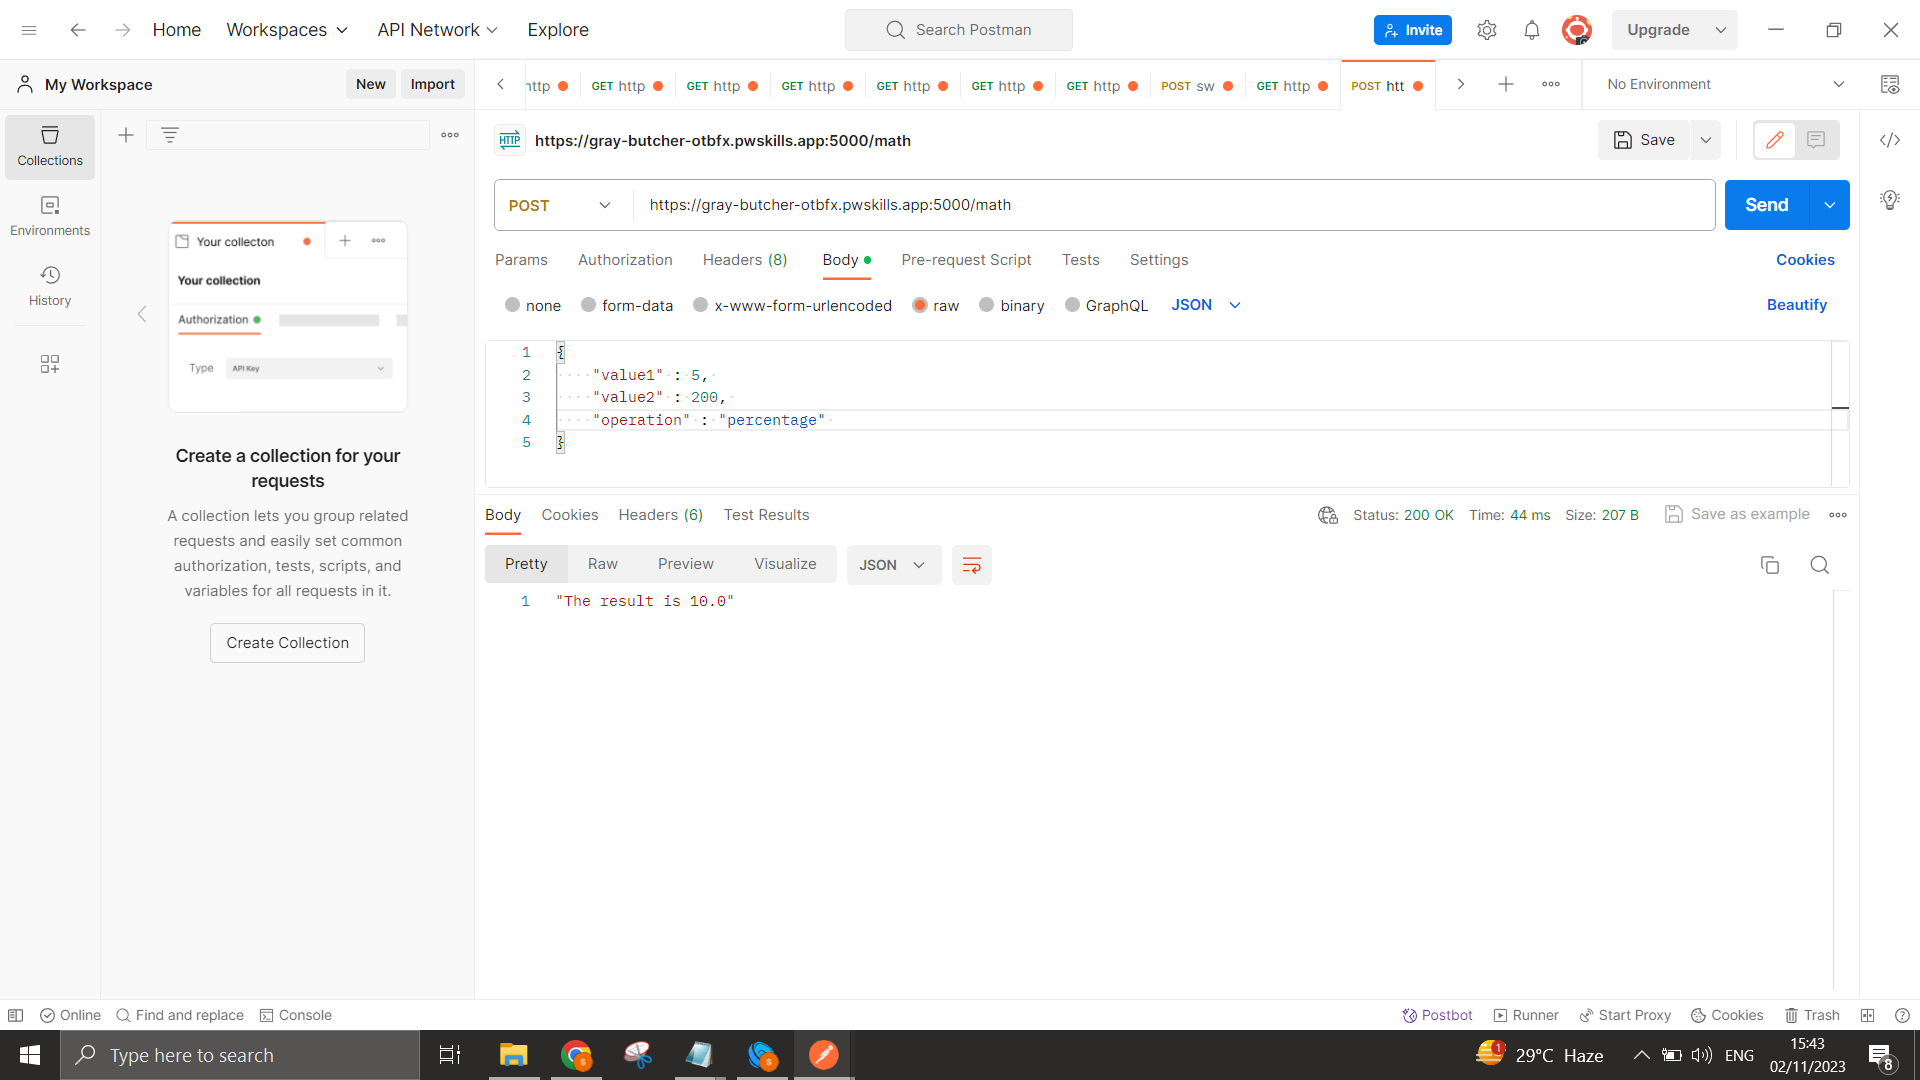